In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [74]:
# Загружаем данные
# В нашем случае - изображения вещей 28 на 28 пикселей,
# которые представленны интенсивностью серого цвета от 0 до 255

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [75]:
# Обозначим таргеты
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [76]:
def show_img(number):
  plt.figure()
  plt.imshow(X_train[number], cmap='plasma')
  plt.colorbar()
  plt.grid(False)

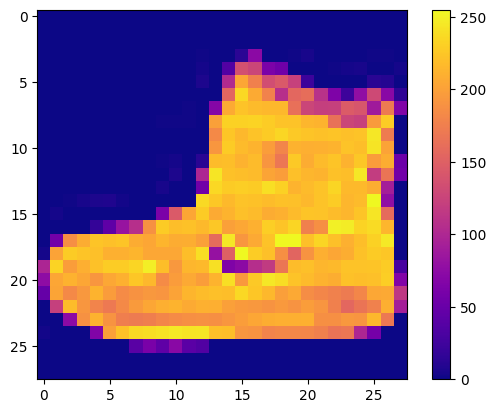

In [77]:
show_img(0)

Как видно данные не нормализованы, сделаем диапазон от 0 до 1 (по опыту нейросеть лучше работает с маленькими числами)

In [78]:
X_train = X_train / 255
X_test = X_test / 255

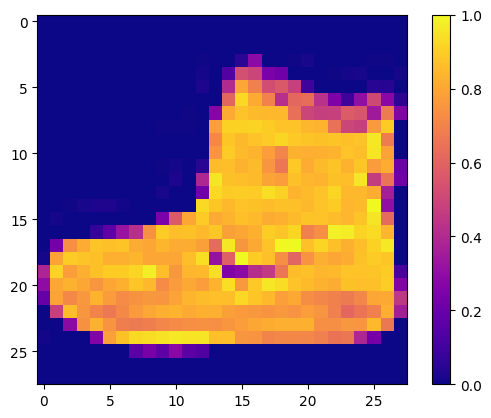

In [79]:
show_img(0)

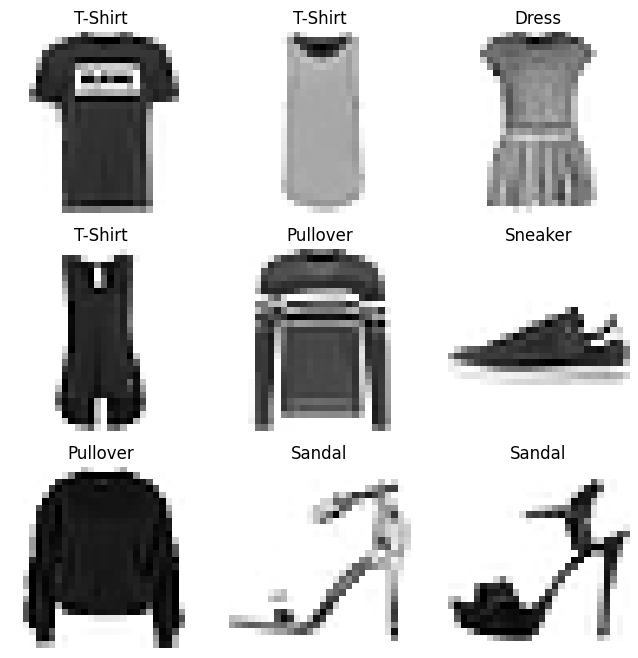

In [62]:
# Выведем предварительно изображения
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[y_train[i]])
    plt.axis("off")
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [80]:
# Создание модели
model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Слой разворачивает изображение в вектор
    keras.layers.Dense(128, activation='relu'), # Первый слой, (в интернете советовали 128 нейронов)
    keras.layers.Dense(10, activation='softmax') # Второй слой (10 нейронов, так как 10 классов)
])

In [81]:
# Компиляция модели, на оптимизацию по SGD, ошибка: кроссэнтропилосс, метрика точности accuracy
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
# Обучение нейронки
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7331 - accuracy: 0.7672
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5112 - accuracy: 0.8260
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4683 - accuracy: 0.8393
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4434 - accuracy: 0.8454
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4262 - accuracy: 0.8522
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4132 - accuracy: 0.8562
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4023 - accuracy: 0.8601
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3931 - accuracy: 0.8626
Epoch 9/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3849 - accuracy: 0.8657
Epoch 10/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3

In [84]:
# Проверка модели на тестовых данных
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8789
Test accuracy: 0.8788999915122986


Выводы: модель имеет хорошие результаты, хоть и есть небольшое переобучение. Первый пет проект удался!

In [89]:
# Узнаем предсказание модели для одного из тестовых примеров
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


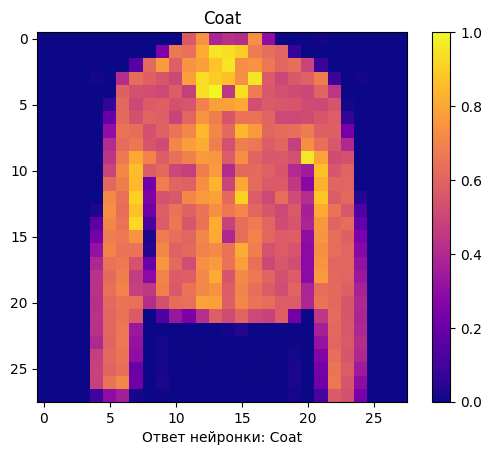

In [90]:
answer = labels_map[np.argmax(predictions[10])]

plt.figure()
plt.imshow(X_test[10], cmap='plasma')
plt.colorbar()
plt.title(labels_map[y_test[10]])
plt.xlabel(f"Ответ нейронки: {answer}")
plt.grid(False)

Совпадение ЕСТЬ!